<a href="https://colab.research.google.com/github/radhikasethi2011/Neuromatch_Fila/blob/main/Copy_of_Copy_of_visualing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upload your kaggle.json file first

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install -q kaggle

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

downloading kaggle dataset

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 96% 143M/149M [00:06<00:00, 27.1MB/s]
100% 149M/149M [00:06<00:00, 24.5MB/s]


In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

imports

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import os
import torchvision
import matplotlib.pyplot as plt #For plotting.
import PIL.Image as Image #For working with image files.
#Importing torch
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torch.utils.data import Dataset,DataLoader #For working with data.
import statistics
from google.colab.patches import cv2_imshow

from torchvision import models,transforms #For pretrained models,image transformations.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Use GPU if it's available or else use CPU.
print(device) #Prints the device we're using.

cpu


picking the first image from training/glioma - printing that, also applying 3 types of filters to it 
1. gaussian blur
2. median blur
3. bilateral filter

original image


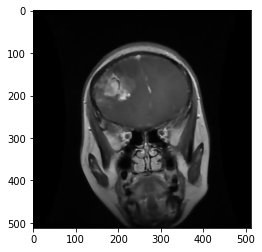

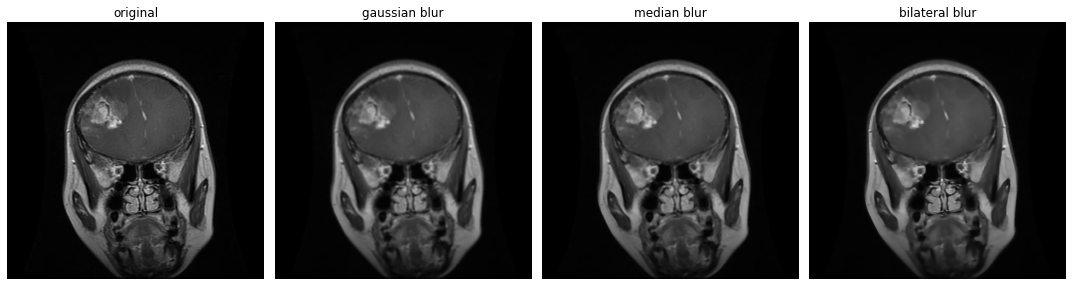

In [ ]:

%matplotlib inline
rgb_list = []
image = cv2.imread('/content/Training/glioma/Tr-glTr_0000.jpg')
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rgb_list.append(RGB_img)
print('original image')
plt.imshow(RGB_img)

Gaussian = cv2.GaussianBlur(image, (7, 7), 0)
RGB_img = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)
rgb_list.append(RGB_img)
plt.imshow(RGB_img)

median = cv2.medianBlur(image, 5)
RGB_img = cv2.cvtColor(median, cv2.COLOR_BGR2RGB)
rgb_list.append(RGB_img)
plt.imshow(RGB_img)
  
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
RGB_img = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)
rgb_list.append(RGB_img)
plt.imshow(RGB_img)

  
# generation of a dictionary of (title, images)

def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.gray())
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
        f = plt.gcf()
        f.set_figwidth(15) # Sets overall figure width to 10 inches
        f.set_figheight(15) # Sets overall figure height to 10 inches    
    plt.tight_layout() # optional
    #lt.show()

number_of_im = 4
title = ['original','gaussian blur', 'median blur', 'bilateral blur']

figures = { title[i]:rgb_list[i]  for i in range(number_of_im)}

# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 1,4)


original image


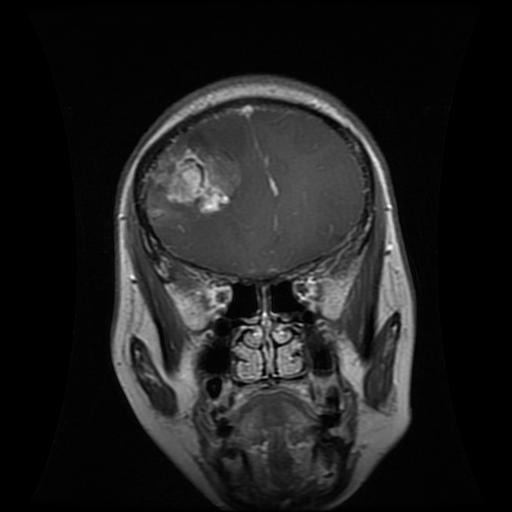

grayscale image


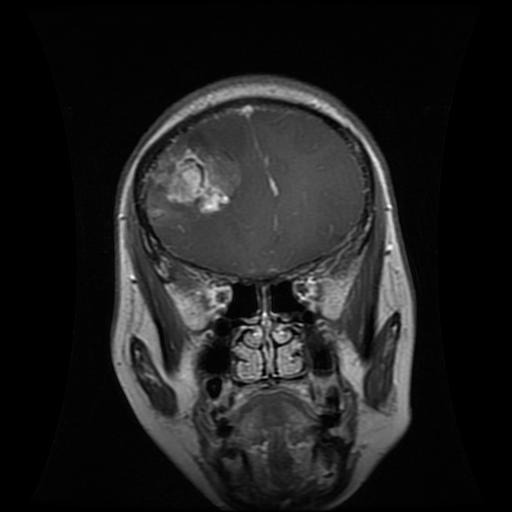

thresholding image


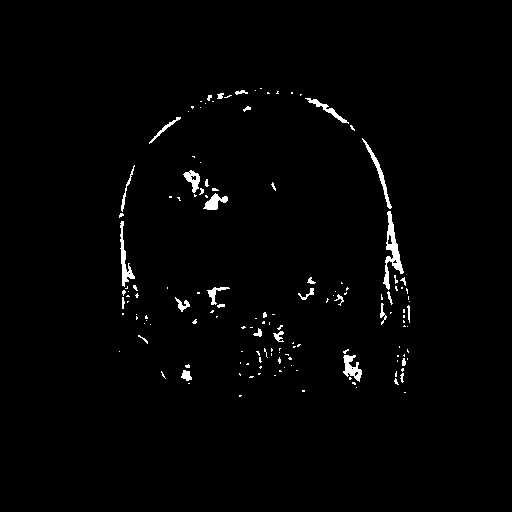

inv threshold image


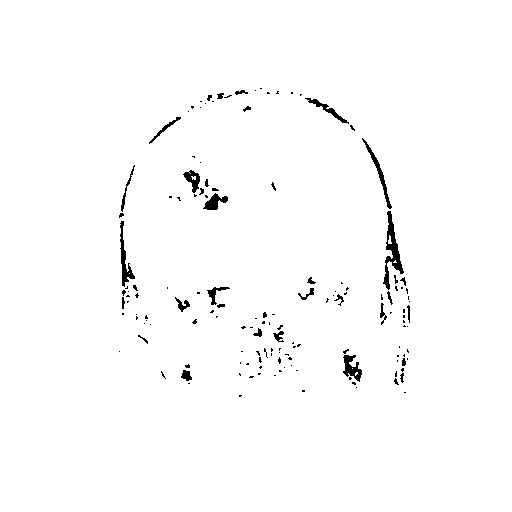

cleaning unwanted parts of image


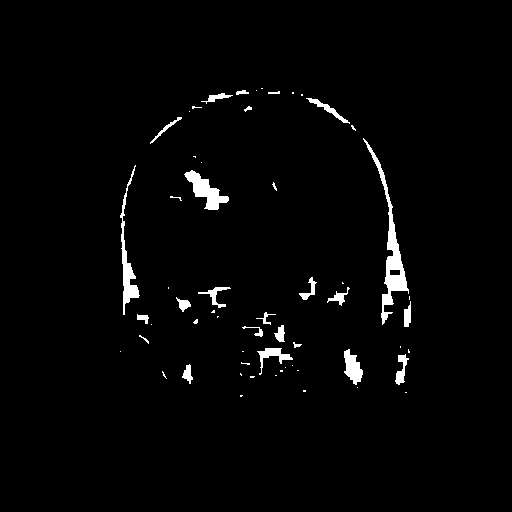

bright areas of the image get thinner, whereas the dark zones gets bigger.


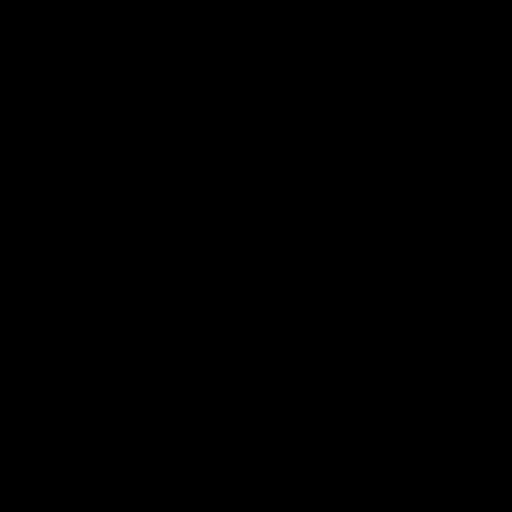

The bright area of the letter dilates around the black regions of the background.


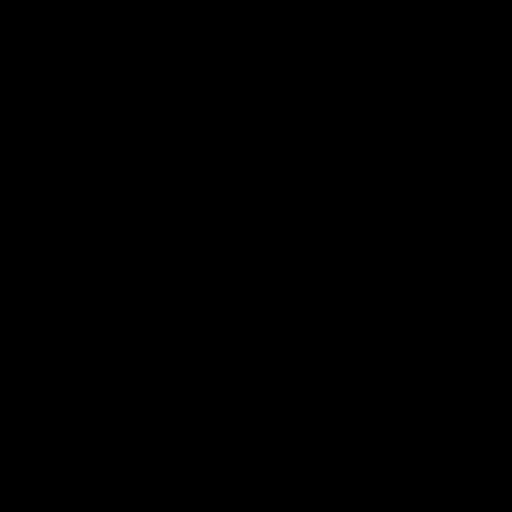

canny edge


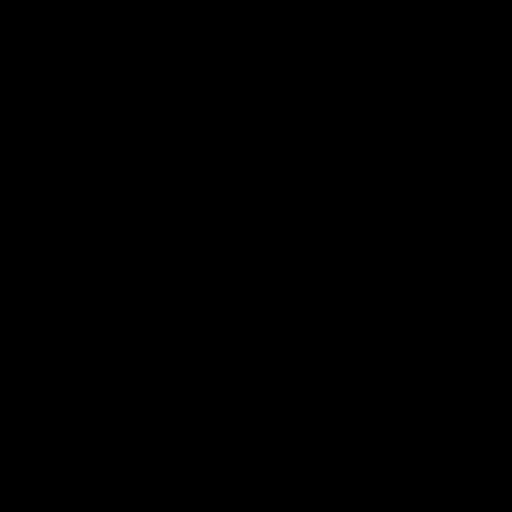

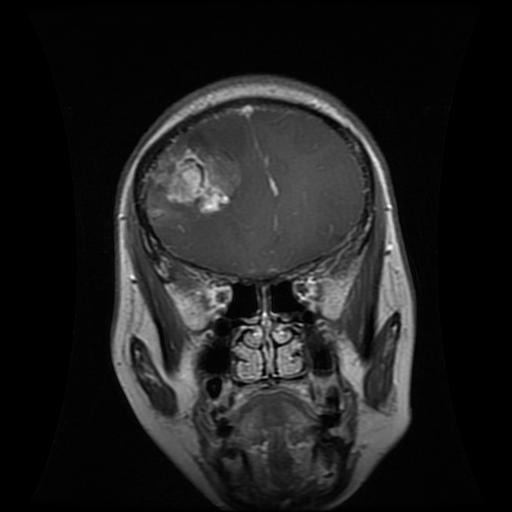

-1

In [ ]:


#IMPORTING IMAGES
rgb_list=[]
image = cv2.imread("/content/Training/glioma/Tr-glTr_0000.jpg")
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rgb_list.append(RGB_img)
print('original image')
cv2_imshow(RGB_img)

#CONVERTING TO GRAY SCALE IMAGE
img1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
print('grayscale image')
cv2_imshow(img1)
#THRESHOLDING THE IMAGE(THRESHOLD VALUE OF PIXEL IS -155)
img2: object
(T, img2) = cv2.threshold(img1, 155, 255, cv2.THRESH_BINARY)
print('thresholding image')
cv2_imshow(img2)
#INVERSE THRESHOLDING THE IMAGE(THRESHOLD VALUE OF PIXEL IS -155)
(T, img3) = cv2.threshold(img1, 155, 255,cv2.THRESH_BINARY_INV)
print('inv threshold image')
cv2_imshow(img3)
#(img3-INVERSE THRESHOLDING,img2-THRESHOLDING)

#MORPHOLOGICAL OPERATION(to remove unwanted part from thresholding image)
kernel=cv2.getStructuringElement(cv2.MORPH_RECT, (10,5))
img4 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)
print('cleaning unwanted parts of image')
cv2_imshow(img4)

#MORPHOLOGICAL OPERATION
img5 = cv2.erode(img4, None, iterations = 14)
img6 = cv2.dilate(img5, None, iterations = 13)
print('bright areas of the image get thinner, whereas the dark zones gets bigger.')
cv2_imshow(img5)
print('The bright area of the letter dilates around the black regions of the background.' )
cv2_imshow(img6)


#CANNY EDGE DETECTOR
img7= cv2.Canny(image=img6, threshold1=100, threshold2=200)
print('canny edge')
cv2_imshow(img7)

#CONTOURS
(cnts,_)=cv2.findContours(img7.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts,-1, (0,0,255),2)
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
def crop_brain_contour(image, plot=False):
# Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

In [ ]:
'''## skeleton of DL model
from comet_ml import Experiment

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

hyper_params = {
    "sequence_length": 28,
    "input_size": 28,
    "hidden_size": 128,
    "num_layers": 2,
    "num_classes": 10,
    "batch_size": 100,
    "num_epochs": 2,
    "learning_rate": 0.01
}

experiment = Experiment(project_name="pytorch")
experiment.log_parameters(hyper_params)

# MNIST Dataset
train_dataset = dsets.MNIST(root='./data/',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data/',
                           train=False,
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=hyper_params['batch_size'],
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=hyper_params['batch_size'],
                                          shuffle=False)

# RNN Model (Many-to-One)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Set initial states
        h0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        # Forward propagate RNN
        out, _ = self.lstm(x, (h0, c0))

        # Decode hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out

rnn = RNN(hyper_params['input_size'], hyper_params['hidden_size'], hyper_params['num_layers'], hyper_params['num_classes'])

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=hyper_params['learning_rate'])

# Train the Model

with experiment.train():
    step = 0
    for epoch in range(hyper_params['num_epochs']):
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(train_loader):
            images = Variable(images.view(-1, hyper_params['sequence_length'], hyper_params['input_size']))
            labels = Variable(labels)

            # Forward + Backward + Optimize
            optimizer.zero_grad()
            outputs = rnn(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Compute train accuracy
            _, predicted = torch.max(outputs.data, 1)
            batch_total = labels.size(0)
            total += batch_total

            batch_correct = (predicted == labels.data).sum()
            correct += batch_correct

            # Log batch_accuracy to Comet.ml; step is each batch
            step += 1
            experiment.log_metric("batch_accuracy", batch_correct / batch_total, step=step)

            if (i + 1) % 100 == 0:
                print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                      % (epoch + 1, hyper_params['num_epochs'], i + 1, len(train_dataset) // hyper_params['batch_size'], loss.item()))

    # Log epoch accuracy to Comet.ml; step is each epoch
        experiment.log_metric("batch_accuracy", correct / total, step=epoch)


with experiment.test():
    # Test the Model
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, hyper_params['sequence_length'], hyper_params['input_size']))
        outputs = rnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    experiment.log_metric("accuracy", correct / total)
    print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))'''

ResNet Model Architecture 

In [ ]:
# instantiate transfer learning model
resnet_model = models.resnet50(pretrained=True)

# set all paramters as trainable
for param in resnet_model.parameters():
    param.requires_grad = True

# get input of fc layer
n_inputs = resnet_model.fc.in_features

# redefine fc layer / top layer/ head for our classification problem
resnet_model.fc = nn.Sequential(nn.Linear(n_inputs, '''X'''), #Need to decide our parameters 
                                nn.SELU(),
                                nn.Dropout(p='''X'''),
                                nn.Linear('''X''', '''X'''),
                                nn.SELU(),
                                nn.Dropout(p='''X'''),
                                nn.Linear('''X''', '''X'''),
                                nn.LogSigmoid())

# set all paramters of the model as trainable
for name, child in resnet_model.named_children():
  for name2, params in child.named_parameters():
    params.requires_grad = True

# set model to run on GPU or CPU absed on availibility
resnet_model.to(device)

# print the trasnfer learning NN model's architecture
resnet_model

In [ ]:
#Train model 
# loss function
# if GPU is available set loss function to use GPU
criterion = nn.CrossEntropyLoss().to(device)

# optimizer
optimizer = torch.optim.SGD(resnet_model.parameters(), momentum=0.9, lr=0.005)

# number of training iterations
epochs = 50

# empty lists to store losses and accuracies
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# set training start time
start_time = time.time()


# set best_prec loss value as 2 for checkpoint threshold
best_prec1 = 2

# empty batch variables
b = None
train_b = None
test_b = None

# start training
for i in range(epochs):
    # empty training correct and test correct counter as 0 during every iteration
    trn_corr = 0
    tst_corr = 0
    
    # set epoch's starting time
    e_start = time.time()
    
    # train in batches
    for b, (y, X) in enumerate(train_gen):
        # set label as cuda if device is cuda

        X = X.to(device)
        y= y.to(device)
          
          # forward pass image sample
        y_pred = resnet_model(X.view(-1, 3, 512, 512))
        gc.collect()
        torch.cuda.empty_cache()
          # calculate loss
        loss = criterion(y_pred.float(), torch.argmax(y.view(32, 4), dim=1).long())

          # get argmax of predicted tensor, which is our label
        predicted = torch.argmax(y_pred, dim=1).data
          # if predicted label is correct as true label, calculate the sum for samples
        batch_corr = (predicted == torch.argmax(y.view(32, 4), dim=1)).sum()
          # increment train correct with correcly predicted labels per batch
        trn_corr += batch_corr
          
          # set optimizer gradients to zero
        optimizer.zero_grad()
          # back propagate with loss
        loss.backward()
          # perform optimizer step
        optimizer.step()
      

    # set epoch's end time
    e_end = time.time()
    # print training metrics
    print(f'Epoch {(i+1)} Batch {(b+1)*4}\nAccuracy: {trn_corr.item()*100/(4*8*b):2.2f} %  Loss: {loss.item():2.4f}  Duration: {((e_end-e_start)/60):.2f} minutes') # 4 images per batch * 8 augmentations per image * batch length

    # some metrics storage for visualization
    train_b = b
    train_losses.append(loss)
    train_correct.append(trn_corr)

    X, y = None, None

    # validate using validation generator
    # do not perform any gradient updates while validation
    with torch.no_grad():
        for b, (y, X) in enumerate(valid_gen):
            X, y = X.to(device), y.to(device)

                # forward pass image
            y_val = resnet_model(X.view(-1, 3, 512, 512)) #MAYBE CHANGE?

                # get argmax of predicted tensor, which is our label
            predicted = torch.argmax(y_val, dim=1).data

                # increment test correct with correcly predicted labels per batch
            tst_corr += (predicted == torch.argmax(y.view(32, 4), dim=1)).sum() #MAYBE CHANGE?

    # get loss of validation set
    loss = criterion(y_val.float(), torch.argmax(y.view(32, 4), dim=1).long()) #MAYBE CHANGE?
    # print validation metrics
    print(f'Validation Accuracy {tst_corr.item()*100/(4*8*b):2.2f} Validation Loss: {loss.item():2.4f}\n')

    # if current validation loss is less than previous iteration's validatin loss create and save a checkpoint
    is_best = loss < best_prec1
    best_prec1 = min(loss, best_prec1)
    save_checkpoint({
            'epoch': i + 1,
            'state_dict': resnet_model.state_dict(),
            'best_prec1': best_prec1,
        }, is_best)

    # some metrics storage for visualization
    test_b  = b
    test_losses.append(loss)
    test_correct.append(tst_corr)

# set total training's end time
end_time = time.time() - start_time    

# print training summary
print("\nTraining Duration {:.2f} minutes".format(end_time/60))
print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
print("GPU memory cached : {} kb".format(torch.cuda.memory_cached()))



In [ ]:
import torch.optim as optim
from tqdm.notebook import trange, tqdm
import time
# I wrote some codes as a template -Optimizer, training loop, backward
# Optimizer
optimizer = optim.Adam(model.parameters()) #for more https://pytorch.org/docs/stable/optim.html - I used Adam in this code this can of course change.

# Then, we need to define a criterion because of compute the loss of your model with its current parameters.
criterion = nn.CrossEntropyLoss() #nn comes from torch.nn .We remember it from our coursework -class MLP(nn.Module):-.

# We then define device.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)         #We place our model and criterion
criterion = criterion.to(device) 

# We'll define a function to calculate the accuracy of our model. This takes the index of the highest value for your prediction and compares it against the actual class label.
# We then divide how many our model got correct by the amount in the batch to calculate accuracy across the batch.
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

#Training Loop

def train(model, iterator, optimizer, criterion, device): #put model into train mode

    epoch_loss = 0 #define epoch lost and acc.
    epoch_acc = 0

    model.train() 

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)
        
        #Place the batch on to our GPU, if we have one
        optimizer.zero_grad() #Clear the gradients calculated from the last batch

        y_pred, _ = model(x)  #Pass our batch of images, x, through to model to get predictions, y_pred

        loss = criterion(y_pred, y) #Calculate the loss between our predictions and the actual labels

        acc = calculate_accuracy(y_pred, y) #Calculate the accuracy between our predictions and the actual labels

        loss.backward() #Calculate the gradients of each parameter

        optimizer.step() #Update the parameters
        
        #Update our metrics
        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
# Evaluate
# The evaluation loop is similar to the training loop.
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0       #We'll use epoch loss and epoch acc later. That's why we keep them as 0.
    epoch_acc = 0

    model.eval()          #We put our model into evaluation mode

    with torch.no_grad(): #We wrap the iterations inside a with torch.no_grad()

    #We do not zero gradients as we are not calculating any

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)
            #Place the batch on to our GPU, if we have one
            y_pred, _ = model(x)

            loss = criterion(y_pred, y) #Calculating loss

            acc = calculate_accuracy(y_pred, y) #Calculating accuracy
            
            #We do not calculate gradients as we are not updating parameters
            #We do not take an optimizer step as we are not calculating gradients

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
#This function tell us how long an epoch took.
def epoch_time(start_time, end_time): #defining function
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
EPOCHS = 10    # Maybe we can change the value later.

best_valid_loss = float('inf')

for epoch in trange(EPOCHS):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device) # train_iterator, valid_iterator A variable that we pull data with data loader.
                                                                                       # Train and Valid data...
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

#Afterwards, we load our the parameters of the model that achieved the best validation loss and then use this to evaluate our model on the test set.
model.load_state_dict(torch.load('model.pt')) #We keep it on the above.

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)   # test_iterator represent test data -variable that we pull data with data loader-.

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')